In [1]:
#Analysis notebook for a fast analysis of the propagation steps

import warnings
warnings.filterwarnings("ignore")

import uproot
import awkward as ak
import numpy as np
import pandas as pd
import plotly.express as px


def get_flattened_array(events, coll, var):
    array = events[coll]['%s.%s_' % (coll, var)].array(library='np')
    array = np.array([i for j in array for i in j])
    return array

def get_flattened_array(events, branch):
    array = events[branch].array(library='np')
    array = np.array([i for j in array for i in j])
    return array

#using plotly as backend
pd.options.plotting.backend = "plotly"

#use pandas instead of awkward array (doesn't work?)
uproot.default_libary="pd"

In [2]:
#The input file containing the propagation steps output and the hits

inputFile="/Users/pbutti/sw/ldmx-sw/evtDisplay/recoil_evt_display.root"


     entry  subentry         g_x       g_y        g_z  sensitive_id  \
0        0         7    6.830000  9.540158 -26.914301             0   
1        0         8    7.000000  9.540348 -26.914370             1   
2        0        11    9.999998  9.543124 -26.915564             0   
3        0        14   12.999998  9.544810 -26.916758             2   
4        0        15   13.170000  9.544874 -26.916826             0   
..     ...       ...         ...       ...        ...           ...   
191      6       103   93.370003  2.266081 -25.663023             0   
192      6       191  181.029999  1.524546 -25.501158             0   
193      6       193  182.199997  1.512178 -25.498993             0   
194      6       194  183.000000  1.503691 -25.497513             8   
195      6       195  183.369995  1.499758 -25.496828             0   

     approach_id  layer_id  color_id  
0              2         2         2  
1              0         2       102  
2              0         2    

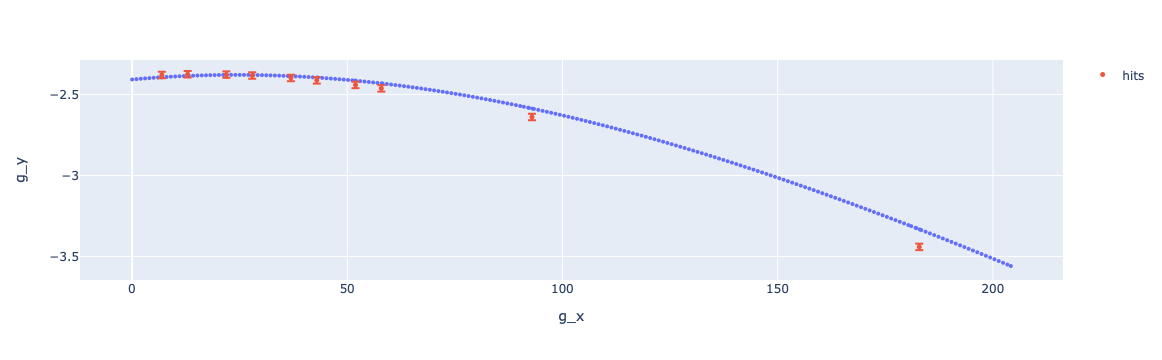

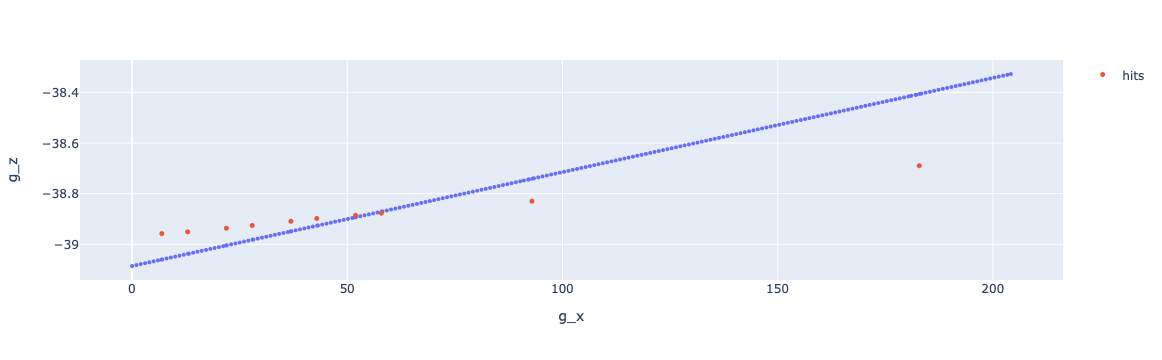

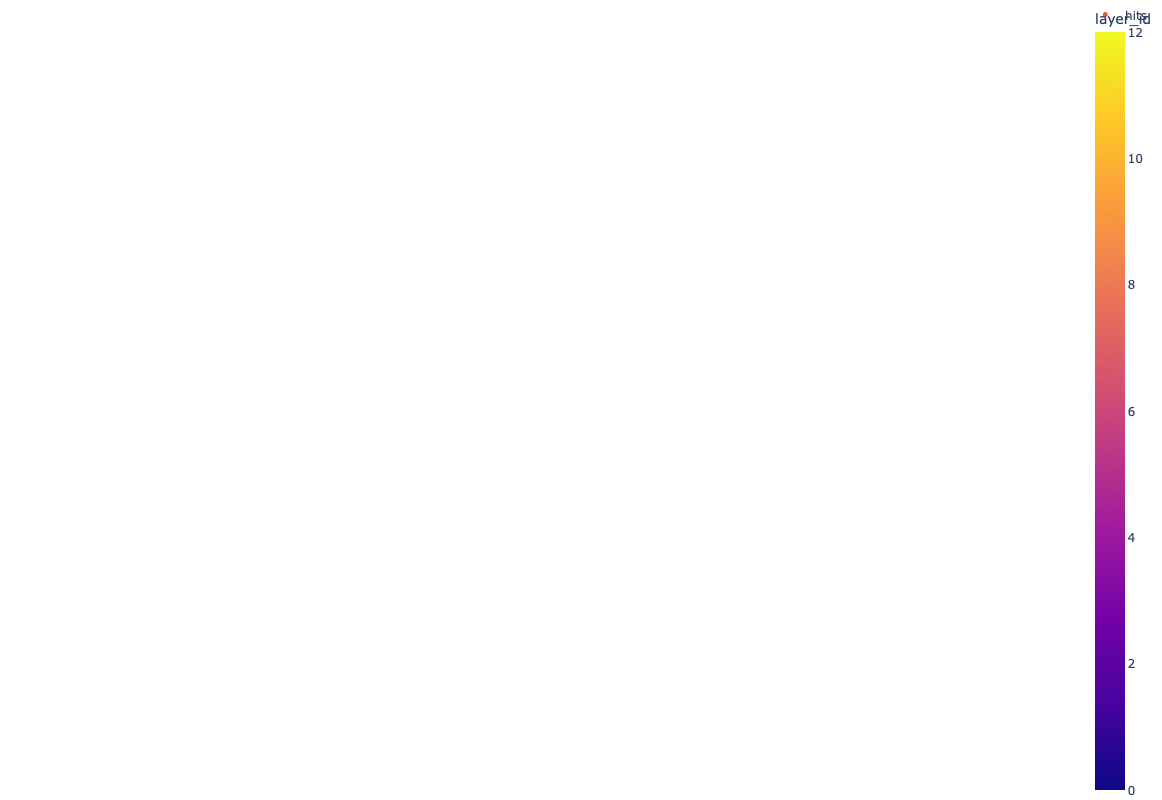

In [5]:
with uproot.open(inputFile) as infile:
    propagation_tree = infile["propagation_steps"]

    #Check the branches in the tree
    #print(propagation_tree.values())

    #Read in the X global position/direction of the steps as panda data frames
    step_position       = propagation_tree.arrays(["g_x","g_y","g_z","sensitive_id","approach_id","layer_id"],"layer_id>0",library="pd")
    step_position_sens  = propagation_tree.arrays(["g_x","g_y","g_z","sensitive_id","approach_id","layer_id"],"sensitive_id>-1",library="pd")
    hits                = propagation_tree.arrays(["hit_x","hit_y","hit_z"],library="pd")
    
    
    
    #print(step_position)
    #print(step_position.droplevel(level=1,axis=0))
    #make a flat df from the multi-index
    flat_step_position = step_position.reset_index()
    flat_step_position_sens = step_position_sens.reset_index()
    flat_step_position["color_id"] = flat_step_position["layer_id"] + 100*flat_step_position["sensitive_id"] 
    flat_step_position_sens["color_id"] = flat_step_position["layer_id"] + 100*flat_step_position["sensitive_id"]
    hits_flat = hits.reset_index()
    
    print(flat_step_position)
    #print(hits_flat["entry"])
    #for ientry in range(len(hits_flat["entry"])):
    #    print(hits_flat["entry"][ientry])
        
    #print(g_x)
    #fig = step_position["g_x"].plot.hist()
    #fig.show()
    
    make2DPlots = True
    
    
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    
    #Select a particular event
    eventNr= 5 #13
    flat_step_position_sens = flat_step_position_sens[flat_step_position_sens["entry"] == eventNr]
    hits_flat               = hits_flat[hits_flat["entry"] == eventNr]
    

    #fig = make_subplots(specs=[[{"secondary_y": True}]])
    #fig.add_trace(trace)
    #fig.add_trace(trace2)
    #fig['layout'].update(height = 600, width = 800, title = title,xaxis=dict(
    #      tickangle=-90))
    #fig.show()
    
    if (make2DPlots):
            
            
        trace1 = go.Scatter(
        x=hits_flat["hit_x"],
        y=hits_flat["hit_y"],
        error_y = dict(
            # value of error bar given in data coordinates
            type ='data',
            array = [0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02],
            visible = True),
        mode='markers',
        marker=dict(
            size=5,
            line=dict(width=0)),
        name='hits')
        
        trace2 = go.Scatter(
        x=hits_flat["hit_x"],
        y=hits_flat["hit_z"],
        mode='markers',
        marker=dict(
            size=5,
            line=dict(width=0)),
        name='hits')
            
        fig = flat_step_position_sens.plot.scatter(x="g_x",y="g_y")
        fig.update_traces(marker_size = 4)
        fig.add_trace(trace1)
        fig.show()
        
        fig = flat_step_position_sens.plot.scatter(x="g_x",y="g_z")
        fig.update_traces(marker_size = 4)
        fig.add_trace(trace2)
        fig.show()
        
        #fig = hits_flat.plot.scatter(x="hit_x",y="hit_y")
        #fig.update_traces(marker_size = 2)
        #fig.show()
        
        #fig = flat_step_position_sens.plot.scatter(x="g_x",y="g_z",color="layer_id")
        #fig.update_traces(marker_size = 2)
        #fig.show()
        
        #fig = flat_step_position_sens.plot.scatter(x="g_x",y="g_z",color="layer_id",range_y=[-24,-23])
        #fig.update_traces(marker_size = 2)
        #fig.ylim([3, 4])
        #fig.show()
        
        trace3 = go.Scatter3d(
        x=hits_flat["hit_x"],
        y=hits_flat["hit_y"],
        z=hits_flat["hit_z"],
        error_y = dict(
            # value of error bar given in data coordinates
            type ='data',
            array = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
            visible = True),
        #error_z = dict(
        #    # value of error bar given in data coordinates
        #    type ='data',
        #    array = [1,1,1,1,1,1,1,1,1,1],
        #    visible = True),
        mode='markers',
        marker=dict(
            size=5,
            line=dict(width=0)),
        name='hits')
    
        fig = px.scatter_3d(flat_step_position_sens, x='g_x', y='g_y', z='g_z', color="layer_id",width=800,height=800)
        fig.update_layout(autosize=False,margin=dict(l=0, r=0, b=0, t=0))
        fig.update_traces(marker_size = 4)
        fig.add_trace(trace3)
        fig.show()
        
        #fig = px.scatter_3d(flat_step_position_sens, x='g_x', y='g_y', z='g_z', color="layer_id",range_z=[-24,-23])
        #fig.update_layout(autosize=False,margin=dict(l=0, r=0, b=0, t=0))
        #fig.update_traces(marker_size = 2)
        #fig.show()
     
        
        
        pass